# <u> The National Alliance of Concurrent Enrollment Partnerships </u>
## 2015-16 Civil Rights Data Collection (CRDC)
## Advanced Placement (AP) v. Dual Enrollment (DE)
### Responses to the Question: "How many Students are taking AP/DE Courses in the School?"
#### Alijah O'Connor - 2018
------------------------------------------------------------------------------------
---
In the 2015-2016 CRDC survey, schools were required to report how many students were enrolled in at least one Dual Enrollment course (in addition to reporting the number of students enrolled in at least one AP Course).  This new inclusion allows for the study of gross participation in these programs. Looking at the 18,667 high schools from the filtered CRDC dataset (for more details, see the intital filtration methodology), the results are reported below in the follow ways:
    - Nationally
    - By School 9-12th Grade Enrollment
    - By School Locale
    - By School Non-White Student Percentage
    - By Student Gender
    - By Student Race
    - By Limited English Proficiency (LEP) / Individuals with Disabilities Education Act (IDEA) Students
    - By State
    - By Region
------------------------------------------------------------------------------------
---

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [3]:
crdc_1516 = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

# Set Up 
Cleaning Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.<br>

**This section sets up most of the calculations needed for the analyses in the report.**

In [4]:
crdc_1516_cleaned = crdc_1516.copy()

In [5]:
from my_functions.extra_functions import missing_value_mapper
crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

In [6]:
"""Total Enrollments"""
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

crdc_1516_cleaned['total_hi_enrollment'] = crdc_1516_cleaned['SCH_ENR_HI_M'] + crdc_1516_cleaned['SCH_ENR_HI_F']
crdc_1516_cleaned['total_am_enrollment'] = crdc_1516_cleaned['SCH_ENR_AM_M'] + crdc_1516_cleaned['SCH_ENR_AM_F']
crdc_1516_cleaned['total_as_enrollment'] = crdc_1516_cleaned['SCH_ENR_AS_M'] + crdc_1516_cleaned['SCH_ENR_AS_F']
crdc_1516_cleaned['total_bl_enrollment'] = crdc_1516_cleaned['SCH_ENR_BL_M'] + crdc_1516_cleaned['SCH_ENR_BL_F']
crdc_1516_cleaned['total_hp_enrollment'] = crdc_1516_cleaned['SCH_ENR_HP_M'] + crdc_1516_cleaned['SCH_ENR_HP_F']
crdc_1516_cleaned['total_tr_enrollment'] = crdc_1516_cleaned['SCH_ENR_TR_M'] + crdc_1516_cleaned['SCH_ENR_TR_F']

crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

In [7]:
"""DE Columns"""
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

In [8]:
"""AP Columns"""
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

crdc_1516_cleaned['ap_white_enrollment'] = crdc_1516_cleaned['SCH_APENR_WH_F'] +  crdc_1516_cleaned['SCH_APENR_WH_M']
crdc_1516_cleaned['ap_nonwhite_enrollment'] = crdc_1516_cleaned['ap_total_enrollment'] - crdc_1516_cleaned['ap_white_enrollment']

crdc_1516_cleaned['ap_hi_enrollment'] = crdc_1516_cleaned['SCH_APENR_HI_M'] + crdc_1516_cleaned['SCH_APENR_HI_F']
crdc_1516_cleaned['ap_am_enrollment'] = crdc_1516_cleaned['SCH_APENR_AM_M'] + crdc_1516_cleaned['SCH_APENR_AM_F']
crdc_1516_cleaned['ap_as_enrollment'] = crdc_1516_cleaned['SCH_APENR_AS_M'] + crdc_1516_cleaned['SCH_APENR_AS_F']
crdc_1516_cleaned['ap_bl_enrollment'] = crdc_1516_cleaned['SCH_APENR_BL_M'] + crdc_1516_cleaned['SCH_APENR_BL_F']
crdc_1516_cleaned['ap_hp_enrollment'] = crdc_1516_cleaned['SCH_APENR_HP_M'] + crdc_1516_cleaned['SCH_APENR_HP_F']
crdc_1516_cleaned['ap_tr_enrollment'] = crdc_1516_cleaned['SCH_APENR_TR_M'] + crdc_1516_cleaned['SCH_APENR_TR_F']

crdc_1516_cleaned['ap_lep_enrollment'] = crdc_1516_cleaned['SCH_APENR_LEP_M'] + crdc_1516_cleaned['SCH_APENR_LEP_F']
crdc_1516_cleaned['ap_idea_enrollment'] = crdc_1516_cleaned['SCH_APENR_IDEA_M'] + crdc_1516_cleaned['SCH_APENR_IDEA_F']

------------------------------------------------------------------------------------------------------------------------------

In [9]:
"""Helper Functions"""
from my_functions.extra_functions import (hs_enrollment_averager, school_sizer, 
                                          region_mapper, eth_grouper, locale_map)

In [10]:
"""HS-Averages"""
crdc_1516_cleaned['hs_total_enrollment'] = hs_enrollment_averager(crdc_1516_cleaned) 

In [11]:
"""Breaking HS-Averages down into categories"""
crdc_1516_cleaned['hs_male'] = round((crdc_1516_cleaned['TOT_ENR_M'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_female'] = round((crdc_1516_cleaned['TOT_ENR_F'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_white'] = round((crdc_1516_cleaned['total_white_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_nonwhite'] = round((crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_hi'] = round((crdc_1516_cleaned['total_hi_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_am'] = round((crdc_1516_cleaned['total_am_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_as'] = round((crdc_1516_cleaned['total_as_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_bl'] = round((crdc_1516_cleaned['total_bl_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_hp'] = round((crdc_1516_cleaned['total_hp_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_tr'] = round((crdc_1516_cleaned['total_tr_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_idea'] = round((crdc_1516_cleaned['total_idea_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_lep'] = round((crdc_1516_cleaned['total_lep_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

In [12]:
"""Add Enrollment-Grouped Column"""
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['hs_total_enrollment'].apply(lambda x: school_sizer(x))

In [13]:
"""Add Region Column"""
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

In [14]:
""" Add Ethnicity Percentage/Quintile """
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

In [15]:
"""Add Locale Column"""
crdc_1516_cleaned['locale_group'] = crdc_1516_cleaned['LOCALE15'].map(locale_map)

# Analysis 
 ----------------------------------------------------------------------------------------

In [16]:
from my_functions.extra_functions import enrollment_compiler, enrollment_compiler_layerer

# National

In [17]:
hs_total_enrollment = crdc_1516_cleaned['hs_total_enrollment'].sum() # Based on the Averager Function

de_total_enrollment = crdc_1516_cleaned['de_total_enrollment'].sum()
de_participation_rate = round(de_total_enrollment / hs_total_enrollment * 100, 1)

ap_total_enrollment = crdc_1516_cleaned['ap_total_enrollment'].sum()
ap_participation_rate = round(ap_total_enrollment / hs_total_enrollment * 100, 1)

national_order = ['HS Total', 'Total DE Students', 'DE Participation Rate',
                  'Total AP Students', 'AP Participation Rate']
national_frame = pd.DataFrame({'HS Total': [hs_total_enrollment],
              'Total DE Students': [de_total_enrollment],
              'DE Participation Rate': [de_participation_rate],
              'Total AP Students': [ap_total_enrollment],
              'AP Participation Rate': [ap_participation_rate]}, 
            index = ['National'])[national_order]
national_frame

,HS Total,Total DE Students,DE Participation Rate,Total AP Students,AP Participation Rate
National,14076669,1151835,8.2,2759810,19.6


# By School 9-12th Grade Enrollment
    - Schools were grouped into four categories based on how many students were enrolled in grades 9-12 in each one:
        - <100
        - 100 - 499
        - 500 - 1199
        - 1200+

In [18]:
size_enrollments = enrollment_compiler(crdc_1516_cleaned, 'size_group')
size_enrollments = size_enrollments.rename({1: '<100', 2: '100-499', 3:'500-1199', 4:'1200+'})
size_enrollments.index.name = 'HS Student Enrollment'
size_enrollments

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
HS Student Enrollment,,,,,,,,,,
<100,131935,0.9,15915,1.4,0.5,12.1,3543,0.1,-0.8,2.7
100-499,2031370,14.4,248251,21.6,7.2,12.2,209151,7.6,-6.8,10.3
500-1199,3641175,25.9,322759,28.0,2.1,8.9,607656,22.0,-3.9,16.7
1200+,8272189,58.8,564910,49.0,-9.8,6.8,1939460,70.3,11.5,23.4


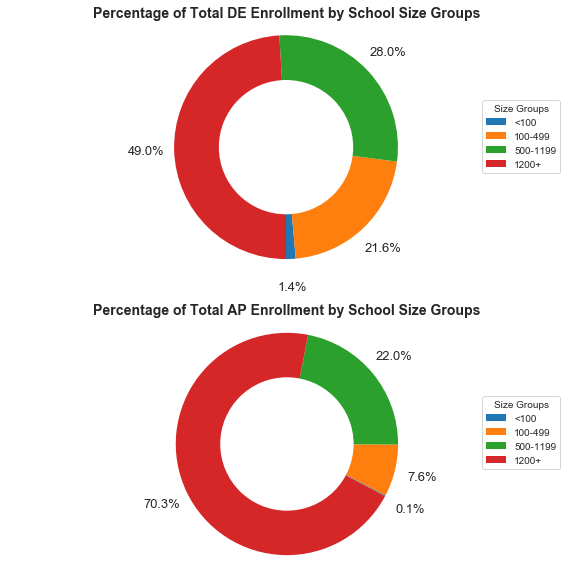

In [19]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = size_enrollments.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = size_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Size Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = size_enrollments.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -28, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = size_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Size Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# By School Locale 
    - Schools were grouped into four categories based on their locale (as defined by the NCES):
        - City: "Territory inside an Urbanized Area and inside a Principal City" 
        - Rural: "Census-defined rural territory"
        - Suburban: "Territory outside a Principal City and inside an Urbanized Area"
        - Town: "Territory inside an Urban Cluster"

In [20]:
locale_enrollments = enrollment_compiler(crdc_1516_cleaned, 'locale_group')
locale_enrollments.index.name = 'Locale'
locale_enrollments

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
Locale,,,,,,,,,,
City,4043376,28.7,258026,22.4,-6.3,6.4,869156,31.5,2.8,21.5
Rural,2782753,19.8,299789,26.0,6.2,10.8,386316,14.0,-5.8,13.9
Suburban,5650946,40.1,414856,36.0,-4.1,7.3,1303792,47.2,7.1,23.1
Town,1599594,11.4,179164,15.6,4.2,11.2,200546,7.3,-4.1,12.5


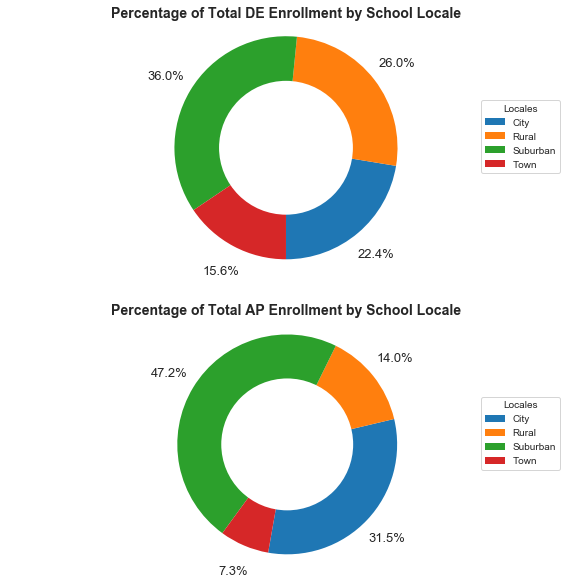

In [21]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = locale_enrollments.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = locale_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Locales',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Locale')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = locale_enrollments.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -100, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = locale_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Locales',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Locale')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# By School Non-White Student Percentage

In [22]:
eth_enrollments = enrollment_compiler(crdc_1516_cleaned, 'eth_quintile')
eth_enrollments = eth_enrollments.rename({1:'0-20%', 2:'21-40%', 3:'41-60%', 4:'61-80%', 5:'81-100%'})
eth_enrollments.index.name = 'Non-White %'
eth_enrollments

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
Non-White %,,,,,,,,,,
0-20%,3495616,24.8,409635,35.6,10.8,11.7,561661,20.4,-4.4,16.1
21-40%,2947191,20.9,283517,24.6,3.7,9.6,645492,23.4,2.5,21.9
41-60%,2444017,17.4,175106,15.2,-2.2,7.2,558645,20.2,2.8,22.9
61-80%,1913111,13.6,127096,11.0,-2.6,6.6,407209,14.8,1.2,21.3
81-100%,3276734,23.3,156481,13.6,-9.7,4.8,586803,21.3,-2.0,17.9


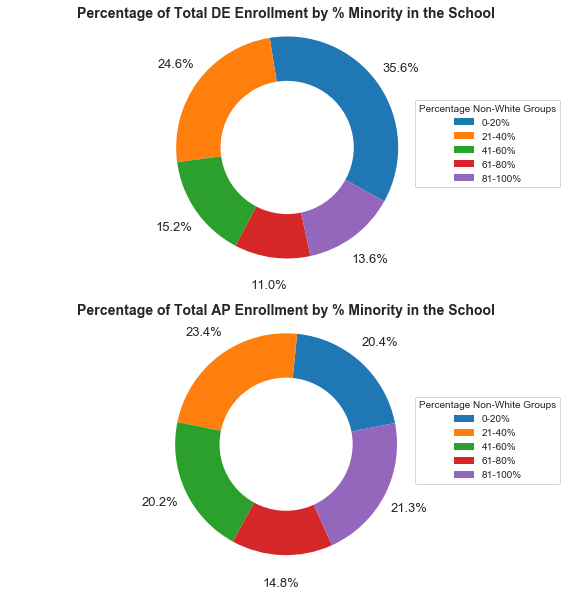

In [23]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = eth_enrollments.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by % Minority in the School')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = eth_enrollments.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by % Minority in the School')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# By Student Gender

In [24]:
male_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_male', 'TOT_DUALENR_M', 'TOT_APENR_M', 'Male')
female_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_female', 'TOT_DUALENR_F', 'TOT_APENR_F', 'Female')
gender_enrollments = pd.concat([male_enroll, female_enroll])
gender_enrollments.index.name = 'Gender'
gender_enrollments

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
Gender,,,,,,,,,,
Male,7180567.0,51.0,523627,45.5,-5.5,7.3,1208082,43.8,-7.2,16.8
Female,6896109.0,49.0,628208,54.5,5.5,9.1,1551728,56.2,7.2,22.5


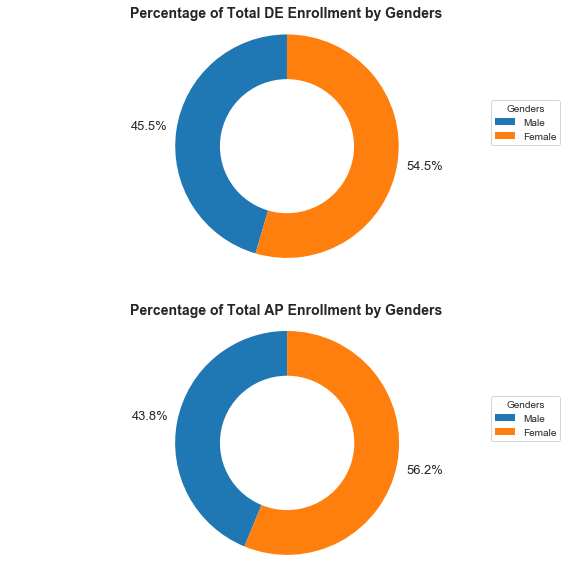

In [25]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = gender_enrollments.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = gender_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Genders',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Genders')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = gender_enrollments.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 90, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = gender_enrollments.index,
           bbox_to_anchor = (1,0.71), title = 'Genders',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Genders')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# By Student Race

In [26]:
hi_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_hi', 'de_hi_enrollment', 'ap_hi_enrollment', 'Hispanic')
am_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_am', 'de_am_enrollment', 'ap_am_enrollment', 'American Indian / Native Alaskan')
as_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_as', 'de_as_enrollment', 'ap_as_enrollment', 'Asian')
bl_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_bl', 'de_bl_enrollment', 'ap_bl_enrollment', 'Black')
hp_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_hp', 'de_hp_enrollment', 'ap_hp_enrollment', 'Native Hawaiian / Pacific Islander')
tr_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_tr', 'de_tr_enrollment', 'ap_tr_enrollment', 'Two or More Races')
wh_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_white', 'de_white_enrollment', 'ap_white_enrollment', 'White')

race_enrollment = pd.concat([hi_enroll, am_enroll, as_enroll, bl_enroll, hp_enroll, tr_enroll, wh_enroll])
race_enrollment.index.name = 'Race'
race_enrollment

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
Race,,,,,,,,,,
Hispanic,3355006.0,23.8,192107,16.7,-7.1,5.7,587911,21.3,-2.5,17.5
American Indian / Native Alaskan,147575.0,1.0,10988,1.0,0.0,7.4,17210,0.6,-0.4,11.7
Asian,733000.0,5.2,58506,5.1,-0.1,8.0,293893,10.6,5.4,40.1
Black,2149001.0,15.3,101766,8.8,-6.5,4.7,260378,9.4,-5.9,12.1
Native Hawaiian / Pacific Islander,58994.0,0.4,4084,0.4,0.0,6.9,9870,0.4,0.0,16.7
Two or More Races,395278.0,2.8,30885,2.7,-0.1,7.8,80514,2.9,0.1,20.4
White,7238792.0,51.4,753499,65.4,14.0,10.4,1510034,54.7,3.3,20.9


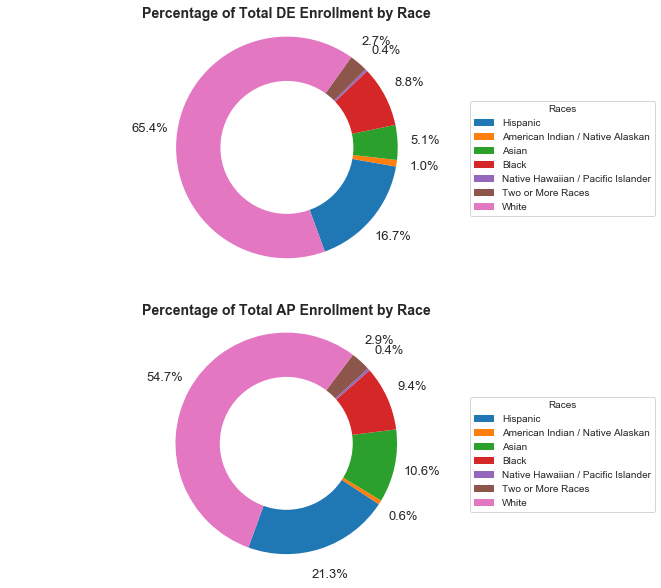

In [27]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = race_enrollment.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(race_enrollment))],
                        startangle = -70, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = race_enrollment.index,
           bbox_to_anchor = (.82,0.71), title = 'Races',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Race')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = race_enrollment.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(race_enrollment))],
                        startangle = -110, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = race_enrollment.index,
           bbox_to_anchor = (.82,0.71), title = 'Races',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Race')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# By Limited English Proficiency (LEP) / Individuals with Disabilities Education Act (IDEA) Students

In [28]:
lep_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_lep', 'de_lep_enrollment', 'ap_lep_enrollment', 'LEP')
idea_enroll = enrollment_compiler_layerer(crdc_1516_cleaned, 'hs_idea', 'de_idea_enrollment', 'ap_idea_enrollment', 'IDEA')
lep_idea_enrollments = pd.concat([lep_enroll, idea_enroll])
lep_idea_enrollments

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
LEP,770724.0,5.5,21231,1.8,-3.7,2.8,52405,1.9,-3.6,6.8
IDEA,1638647.0,11.6,43107,3.7,-7.9,2.6,42576,1.5,-10.1,2.6


# By State
    - Sorted by DE Participation Rate in Descending Order

In [29]:
state_enrollments = enrollment_compiler(crdc_1516_cleaned, 'LEA_STATE')
state_enrollments.index.name = 'State'
state_enrollments.sort_values('DE Participation Rate', ascending=False)

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
State,,,,,,,,,,
IN,301456,2.1,69580,6.0,3.9,23.1,53667,1.9,-0.2,17.8
IA,138546,1.0,31135,2.7,1.7,22.5,15546,0.6,-0.4,11.2
ID,73671,0.5,15712,1.4,0.9,21.3,10204,0.4,-0.1,13.9
WY,25286,0.2,4802,0.4,0.2,19.0,2743,0.1,-0.1,10.8
WI,249627,1.8,45113,3.9,2.1,18.1,53847,2.0,0.2,21.6
KS,139234,1.0,24312,2.1,1.1,17.5,17425,0.6,-0.4,12.5
WA,300732,2.1,51780,4.5,2.4,17.2,61535,2.2,0.1,20.5
OR,162660,1.2,26742,2.3,1.1,16.4,26304,1.0,-0.2,16.2
UT,149785,1.1,22975,2.0,0.9,15.3,32401,1.2,0.1,21.6


#### Visualizing AP and DE Participation Rates by State

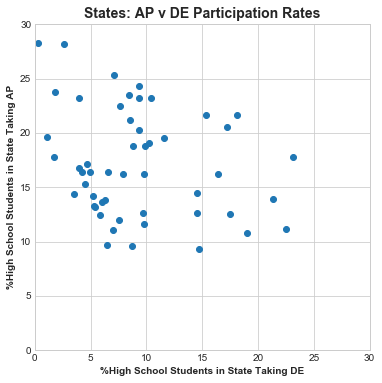

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(x=state_enrollments['DE Participation Rate'], y=state_enrollments['AP Participation Rate'])
plt.ylim([0,30])
plt.xlim([0,30])
plt.ylabel('%High School Students in State Taking AP')
plt.xlabel('%High School Students in State Taking DE')
plt.yticks(np.arange(0,35,5))
plt.xticks(np.arange(0,35,5))
plt.title('States: AP v DE Participation Rates')
plt.show()

# By Region
    - Regions are broken down according to the regional accreditation guidelines.
    
        - Higher Learning Commission (HLC): Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan,
          Minnesota, Missouri, North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, 
          West Virginia, and Wyoming. 
          
        - Middle States Commission on Higher Education (MSCHE): New York, New Jersey, Pennsylvania, Delaware, 
          Maryland, the District of Columbia.
          
        - New England Association of Schools and Colleges (NEASC): Connecticut, Maine, Massachusetts, New Hampshire,
          Rhode Island, and Vermont.
          
        - Northwest Commission on Colleges and Universities (NWCCU): Alaska, Idaho, Montana, Nevada, Oregon, 
          Utah, and Washington. 
          
        - Southern Association of Colleges and Schools (SACS): Alabama, Florida, Georgia, Kentucky, 
          Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Texas and Virginia.
          
        - Western Association of Schools and Colleges (WASC): Hawaii, California 

In [31]:
region_enrollment = enrollment_compiler(crdc_1516_cleaned, 'region_accred')
region_enrollment.index.name = 'Region'
region_enrollment

,HS Students,%Total HS Students,DE Students,%Total DE Students,DE Gap,DE Participation Rate,AP Students,%Total AP Students,AP Gap,AP Participation Rate
Region,,,,,,,,,,
HLC,4048757,28.8,462600,40.2,11.4,11.4,685449,24.8,-4.0,16.9
MSCHE,2016968,14.3,148130,12.9,-1.4,7.3,391457,14.2,-0.1,19.4
NEASC,616284,4.4,26730,2.3,-2.1,4.3,113548,4.1,-0.3,18.4
NWCCU,898097,6.4,124488,10.8,4.4,13.9,163451,5.9,-0.5,18.2
SACS,4702696,33.4,356015,30.9,-2.5,7.6,984399,35.7,2.3,20.9
WASC,1793867,12.7,33872,2.9,-9.8,1.9,421506,15.3,2.6,23.5


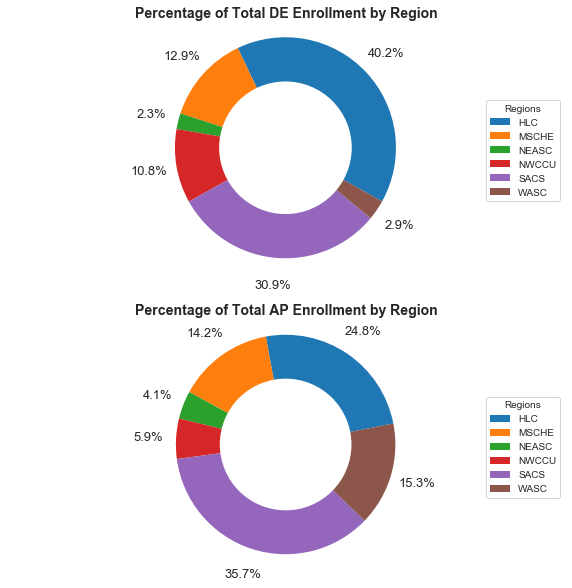

In [32]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = region_enrollment.plot.pie(y = 'DE Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = region_enrollment.index,
           bbox_to_anchor = (1,0.71), title = 'Regions',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = region_enrollment.plot.pie(y = 'AP Students',
                        autopct='%1.1f%%', #explode = [.05 for i in range(len(eth_enrollments))],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = region_enrollment.index,
           bbox_to_anchor = (1,0.71), title = 'Regions',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()